# Massage peruskarttarasteri to show up correctly
Samuli Launiainen  

Uses gis-packages rasterio etc.  
Set up of the environment as in: https://geo-python-site.readthedocs.io/en/latest/course-info/installing-miniconda.html


# Import modules

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
#import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import os
from pathlib import Path
import numpy as np
from PIL import Image
from raster_utils import convert_peruskarttarasteri, show_raster, window_from_extent, read_pkrasteri_for_extent


Convert peruskarttarasteri from P-image to RGB, save as geotiff

In [9]:

# Data dir
data_dir = r"temp"

fps = list(Path(data_dir).glob('*.png'))

# convert png to geotiff and return list of filenames
outfiles = []
for fp in fps:
    print(fp)
    f = convert_peruskarttarasteri(str(fp), epsg_code='3067')
    outfiles.append(f)

#del f

temp\L4113L.png
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 12000, 'height': 12000, 'count': 1, 'crs': CRS.from_epsg(3067), 'transform': Affine(1.0, 0.0, 332000.0,
       0.0, -1.0, 6678000.0)}


C:\Users\03081268\Anaconda3\envs\geo-python-student\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (144000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


writing...
temp\L4113R.png
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 12000, 'height': 12000, 'count': 1, 'crs': CRS.from_epsg(3067), 'transform': Affine(1.0, 0.0, 344000.0,
       0.0, -1.0, 6678000.0)}
writing...
temp\L4114L.png
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 12000, 'height': 12000, 'count': 1, 'crs': CRS.from_epsg(3067), 'transform': Affine(1.0, 0.0, 332000.0,
       0.0, -1.0, 6690000.0)}
writing...
temp\L4114R.png
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 12000, 'height': 12000, 'count': 1, 'crs': CRS.from_epsg(3067), 'transform': Affine(1.0, 0.0, 344000.0,
       0.0, -1.0, 6690000.0)}
writing...
temp\L4123L.png
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 12000, 'height': 12000, 'count': 1, 'crs': CRS.from_epsg(3067), 'transform': Affine(1.0, 0.0, 332000.0,
       0.0, -1.0, 6702000.0)}
writing...


In [ ]:
### Show first tiff -image

<AxesSubplot:>

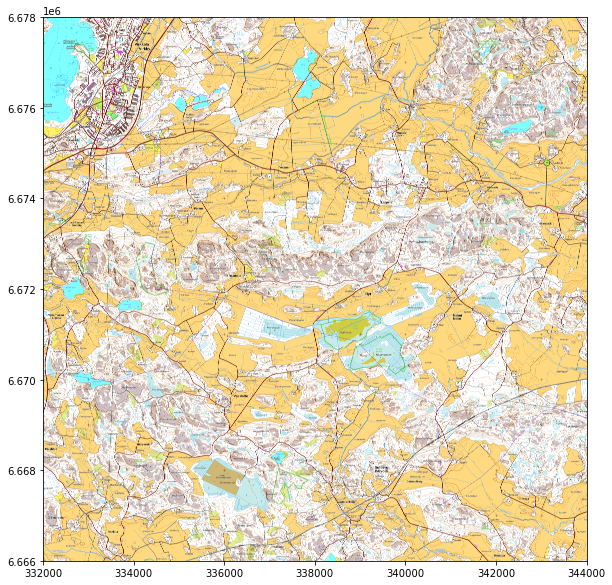

In [16]:
s= rasterio.open(outfiles[0], 'r')  
fig1, ax1 = plt.subplots(1,1, figsize=(10,10))
show(s, transform=s.meta['transform'], ax=ax1)

### Create raster mosaic from created .tif files

In [19]:
pk_mosaic, out_trans = merge(outfiles)  
out_meta = s.meta.copy()
out_meta.update({"driver": "GTiff",
                 "height": pk_mosaic.shape[1],
                 "width": pk_mosaic.shape[2],
                "transform": out_trans,
                })
#show(pk_mosaic)  

with rasterio.open(r'temp/pkmosaic.tif', "w", **out_meta) as dest:
    dest.write(pk_mosaic)
print('writing ok!')

writing ok!


In [20]:
s.close()